# Objective for Part 4

In previous Part 1-3, we performed 
- data extraction thru API call and data cleaning.
- feature engineering
- EDA to see the patterns and trends using Time Series data.

We will now proceed with ML model building and train with our dataset and evaluate our models using test data.


In [1]:
# Step 1: Import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#filter Python warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Step 2: Read your CSV
df = pd.read_csv('taxi3.csv',index_col=False)
df.head()

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8
0,5887,1,0,0,167,979,81,408,3507,678,0,67
1,4001,1,5,0,102,496,39,251,2589,471,0,53
2,5981,1,10,0,157,1035,69,417,3546,680,0,77
3,5461,1,15,0,158,920,68,375,3225,654,0,61
4,5003,1,20,0,136,900,62,358,2898,596,0,53


In [3]:
# Step 3: Prepare the independent and dependent variables. 
X=df[['day_of_week','minute','hour']]
# Note: make sure you have 1 variable containing the independent variables, 
# and 5 variables each containing the individual dependent variable
y1 = df[['sector_1']]
y2 = df[['sector_2']]
y4 = df[['sector_4']]
y5 = df[['sector_5']]
y8 = df[['sector_8']]

In [4]:
# Step 4: Import the libraries that you need
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
# Step 5: Split your data into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y5, test_size=0.2)

X_train8, X_test8, y_train8, y_test8 = train_test_split(X, y8, test_size=0.2)

In [6]:
# Step 6a: Declare a variable to store the model
dummy1 = DummyRegressor()
dummy2 = DummyRegressor()
dummy4 = DummyRegressor()
dummy5 = DummyRegressor()
dummy8 = DummyRegressor()

# Step 6b: Fit your train dataset
dummy1.fit(X_train1, y_train1)
dummy2.fit(X_train2, y_train2)
dummy4.fit(X_train4, y_train4)
dummy5.fit(X_train5, y_train5)
dummy8.fit(X_train8, y_train8)

# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
dummy1_pred = dummy1.predict(X_test1)
dummy2_pred = dummy2.predict(X_test2)
dummy4_pred = dummy4.predict(X_test4)
dummy5_pred = dummy5.predict(X_test5)
dummy8_pred = dummy8.predict(X_test8)

In [7]:
# Step 7: Repeat Step 6 with other models
#Linear Regressor
linear1 = LinearRegression()
linear2 = LinearRegression()
linear4 = LinearRegression()
linear5 = LinearRegression()
linear8 = LinearRegression()

linear1.fit(X_train1, y_train1)
linear2.fit(X_train2, y_train2)
linear4.fit(X_train4, y_train4)
linear5.fit(X_train5, y_train5)
linear8.fit(X_train8, y_train8)

linear1_pred = linear1.predict(X_test1)
linear2_pred = linear2.predict(X_test2)
linear4_pred = linear4.predict(X_test4)
linear5_pred = linear5.predict(X_test5)
linear8_pred = linear8.predict(X_test8)

In [8]:
# Step 7: Repeat Step 6 with other models
#DecisionTreeRegressor
decisiontree1 = DecisionTreeRegressor()
decisiontree2 = DecisionTreeRegressor()
decisiontree4 = DecisionTreeRegressor()
decisiontree5 = DecisionTreeRegressor()
decisiontree8 = DecisionTreeRegressor()

decisiontree1.fit(X_train1, y_train1)
decisiontree2.fit(X_train2, y_train2)
decisiontree4.fit(X_train4, y_train4)
decisiontree5.fit(X_train5, y_train5)
decisiontree8.fit(X_train8, y_train8)

decisiontree1_pred = decisiontree1.predict(X_test1)
decisiontree2_pred = decisiontree2.predict(X_test2)
decisiontree4_pred = decisiontree4.predict(X_test4)
decisiontree5_pred = decisiontree5.predict(X_test5)
decisiontree8_pred = decisiontree8.predict(X_test8)

In [9]:
# Step 7: Repeat Step 6 with other models
#RandomForestRegressor
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()
rf4 = RandomForestRegressor()
rf5 = RandomForestRegressor()
rf8 = RandomForestRegressor()

rf1.fit(X_train1, y_train1.values.ravel())
rf2.fit(X_train2, y_train2.values.ravel())
rf4.fit(X_train4, y_train4.values.ravel())
rf5.fit(X_train5, y_train5.values.ravel())
rf8.fit(X_train8, y_train8.values.ravel())

rf1_pred = rf1.predict(X_test1)
rf2_pred = rf2.predict(X_test2)
rf4_pred = rf4.predict(X_test4)
rf5_pred = rf5.predict(X_test5)
rf8_pred = rf8.predict(X_test8)

In [10]:
y_test1['dummy1_pred'] = dummy1_pred.tolist()
y_test1['linear1_pred'] = linear1_pred
y_test1['decisiontree1_pred'] = decisiontree1_pred.tolist()
y_test1['rf1_pred'] = rf1_pred.tolist()

RMSE for dummy1_pred vs sector_1: 46.98526033596039
Normal RMSE for dummy1_pred : 0.17401948272577922
RMSE for linear1_pred vs sector_1: 46.583535041083856
Normal RMSE for linear1_pred : 0.17253161126327354
RMSE for decisiontree1_pred vs sector_1: 31.613571840477622
Normal RMSE for decisiontree1_pred : 0.11708730311288008
RMSE for rf1_pred vs sector_1: 30.58480285916815
Normal RMSE for rf1_pred : 0.11327704762654871


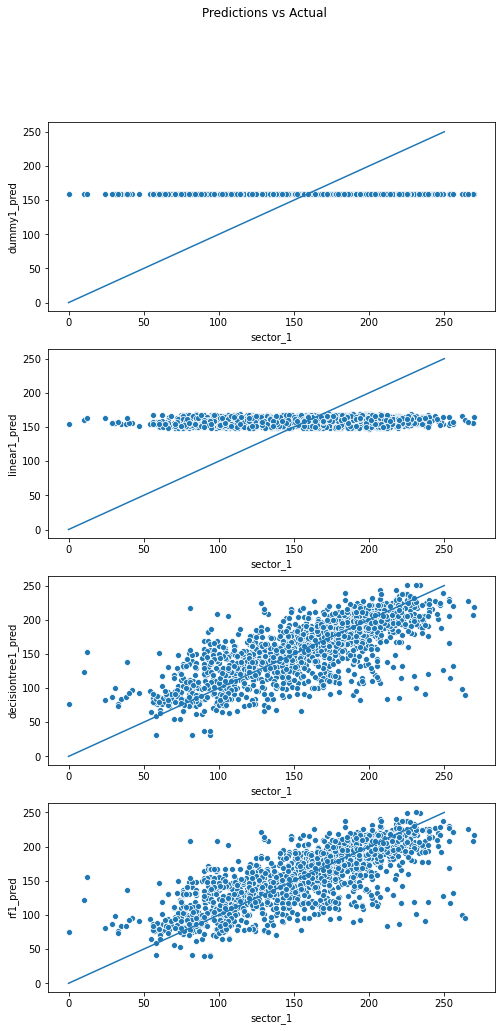

In [11]:
# Step 8a: Print the RMSE between the y test and the prediction

# Step 8b: Plot a scatter plot test dependent variables vs predictions
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharey=True)
fig.suptitle('Predictions vs Actual')
line_df = {'x':[0,250], 'y':[0,250]}

def subplot_model(i, model):
    rmse = mean_squared_error(y_test1['sector_1'], y_test1[model], squared=False)
    print(f"RMSE for {model} vs sector_1: {rmse}")
    normal_rmse = rmse/(y_test1['sector_1'].max() - y_test1['sector_1'].min())
    print(f"Normal RMSE for {model} : {normal_rmse}")
    sns.lineplot(ax=axes[i], data=line_df, x='x', y='y')
    sns.scatterplot(ax=axes[i], data=y_test1, x='sector_1', y=model)

models = y_test1.columns[-4:].tolist()
i = 0
for model in models:
    subplot_model(i, model)
    i += 1
plt.show()

### Repeat Step 5 - 8 with the other sector data
This way, we can see which model does best in predicting the taxi availability for  all sectors.

In [12]:
# Try Step 5-8 with other sector data

In [13]:
y_test2['dummy2_pred'] = dummy2_pred.tolist()
y_test2['linear2_pred'] = linear2_pred
y_test2['decisiontree2_pred'] = decisiontree2_pred.tolist()
y_test2['rf2_pred'] = rf2_pred.tolist()

RMSE for dummy2_pred vs sector_2: 226.57978740201727
Normal RMSE for dummy2_pred : 0.166725377043427
RMSE for linear2_pred vs sector_2: 225.52521343177983
Normal RMSE for linear2_pred : 0.16594938442367904
RMSE for decisiontree2_pred vs sector_2: 134.28065510732085
Normal RMSE for decisiontree2_pred : 0.09880842907087627
RMSE for rf2_pred vs sector_2: 131.7423601601103
Normal RMSE for rf2_pred : 0.09694066236947042


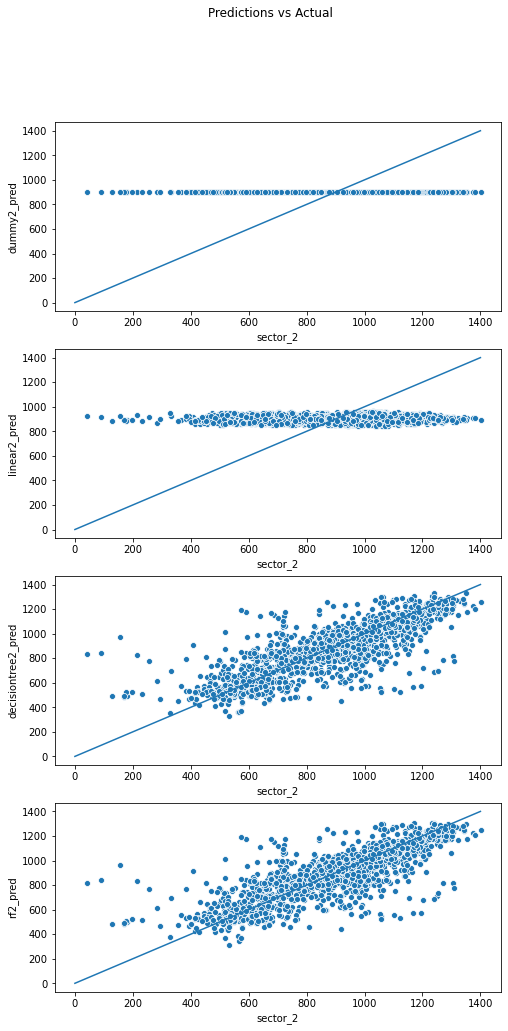

In [14]:
# Step 8a: Print the RMSE between the y test and the prediction

# Step 8b: Plot a scatter plot test dependent variables vs predictions
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharey=True)
fig.suptitle('Predictions vs Actual')
line_df = {'x':[0,1400], 'y':[0,1400]}

def subplot_model(i, model):
    rmse = mean_squared_error(y_test2['sector_2'], y_test2[model], squared=False)
    print(f"RMSE for {model} vs sector_2: {rmse}")
    normal_rmse = rmse/(y_test2['sector_2'].max() - y_test2['sector_2'].min())
    print(f"Normal RMSE for {model} : {normal_rmse}")
    sns.lineplot(ax=axes[i], data=line_df, x='x', y='y')
    sns.scatterplot(ax=axes[i], data=y_test2, x='sector_2', y=model)

models = y_test2.columns[-4:].tolist()
i = 0
for model in models:
    subplot_model(i, model)
    i += 1
plt.show()

In [15]:
y_test4['dummy4_pred'] = dummy4_pred.tolist()
y_test4['linear4_pred'] = linear4_pred
y_test4['decisiontree4_pred'] = decisiontree4_pred.tolist()
y_test4['rf4_pred'] = rf4_pred.tolist()

RMSE for dummy4_pred vs sector_4: 111.88738254198663
Normal RMSE for dummy4_pred : 0.14307849429921563
RMSE for linear4_pred vs sector_4: 106.62848238681887
Normal RMSE for linear4_pred : 0.13635355803941032
RMSE for decisiontree4_pred vs sector_4: 87.65940200413776
Normal RMSE for decisiontree4_pred : 0.11209642200017617
RMSE for rf4_pred vs sector_4: 85.50175242632523
Normal RMSE for rf4_pred : 0.10933727931755144


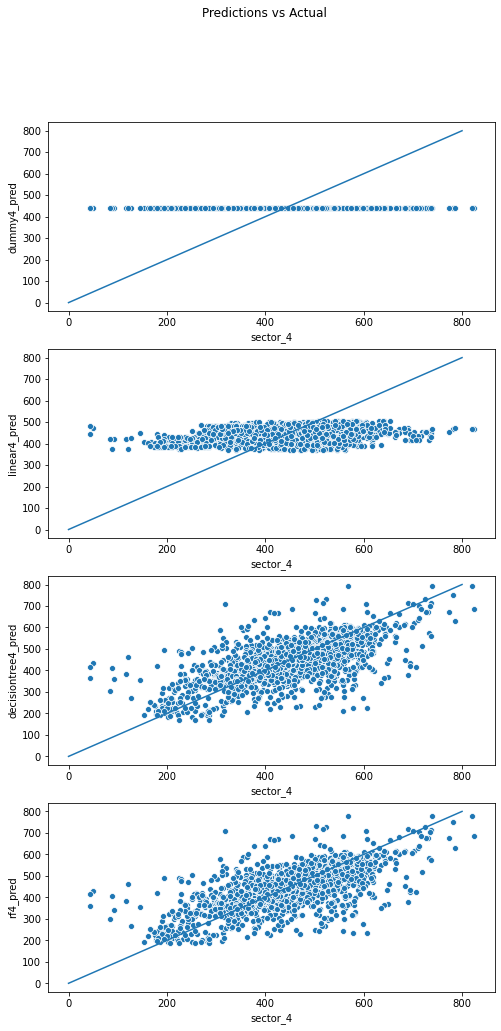

In [16]:
# Step 8a: Print the RMSE between the y test and the prediction

# Step 8b: Plot a scatter plot test dependent variables vs predictions
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharey=True)
fig.suptitle('Predictions vs Actual')
line_df = {'x':[0,800], 'y':[0,800]}

def subplot_model(i, model):
    rmse = mean_squared_error(y_test4['sector_4'], y_test4[model], squared=False)
    print(f"RMSE for {model} vs sector_4: {rmse}")
    normal_rmse = rmse/(y_test4['sector_4'].max() - y_test4['sector_4'].min())
    print(f"Normal RMSE for {model} : {normal_rmse}")
    sns.lineplot(ax=axes[i], data=line_df, x='x', y='y')
    sns.scatterplot(ax=axes[i], data=y_test4, x='sector_4', y=model)

models = y_test4.columns[-4:].tolist()
i = 0
for model in models:
    subplot_model(i, model)
    i += 1
plt.show()

In [17]:
y_test5['dummy5_pred'] = dummy5_pred.tolist()
y_test5['linear5_pred'] = linear5_pred
y_test5['decisiontree5_pred'] = decisiontree5_pred.tolist()
y_test5['rf5_pred'] = rf5_pred.tolist()

RMSE for dummy5_pred vs sector_5: 543.8760998515536
Normal RMSE for dummy5_pred : 0.15916772017897382
RMSE for linear5_pred vs sector_5: 527.5630122598219
Normal RMSE for linear5_pred : 0.15439362372251153
RMSE for decisiontree5_pred vs sector_5: 410.7718075728746
Normal RMSE for decisiontree5_pred : 0.12021416668799373
RMSE for rf5_pred vs sector_5: 394.4552636688922
Normal RMSE for rf5_pred : 0.11543905872662927


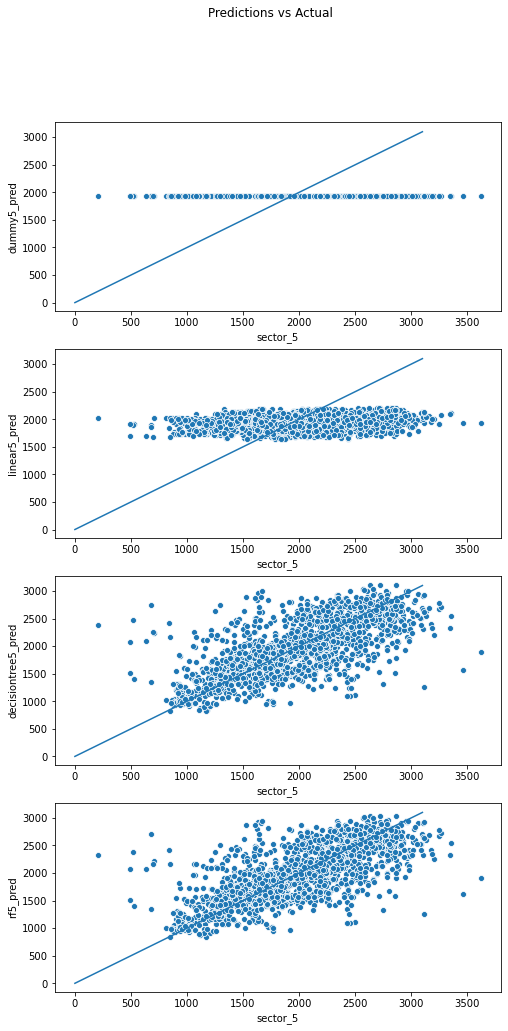

In [18]:
# Step 8a: Print the RMSE between the y test and the prediction

# Step 8b: Plot a scatter plot test dependent variables vs predictions
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharey=True)
fig.suptitle('Predictions vs Actual')
line_df = {'x':[0,3100], 'y':[0,3100]}

def subplot_model(i, model):
    rmse = mean_squared_error(y_test5['sector_5'], y_test5[model], squared=False)
    print(f"RMSE for {model} vs sector_5: {rmse}")
    normal_rmse = rmse/(y_test5['sector_5'].max() - y_test5['sector_5'].min())
    print(f"Normal RMSE for {model} : {normal_rmse}")
    sns.lineplot(ax=axes[i], data=line_df, x='x', y='y')
    sns.scatterplot(ax=axes[i], data=y_test5, x='sector_5', y=model)

models = y_test5.columns[-4:].tolist()
i = 0
for model in models:
    subplot_model(i, model)
    i += 1
plt.show()

In [19]:
y_test8['dummy8_pred'] = dummy8_pred.tolist()
y_test8['linear8_pred'] = linear8_pred
y_test8['decisiontree8_pred'] = decisiontree8_pred.tolist()
y_test8['rf8_pred'] = rf8_pred.tolist()

RMSE for dummy8_pred vs sector_8: 13.465510987050171
Normal RMSE for dummy8_pred : 0.16421354862256307
RMSE for linear8_pred vs sector_8: 13.299022206707336
Normal RMSE for linear8_pred : 0.1621831976427724
RMSE for decisiontree8_pred vs sector_8: 12.076449548427819
Normal RMSE for decisiontree8_pred : 0.14727377498082705
RMSE for rf8_pred vs sector_8: 11.686017126725751
Normal RMSE for rf8_pred : 0.14251240398446038


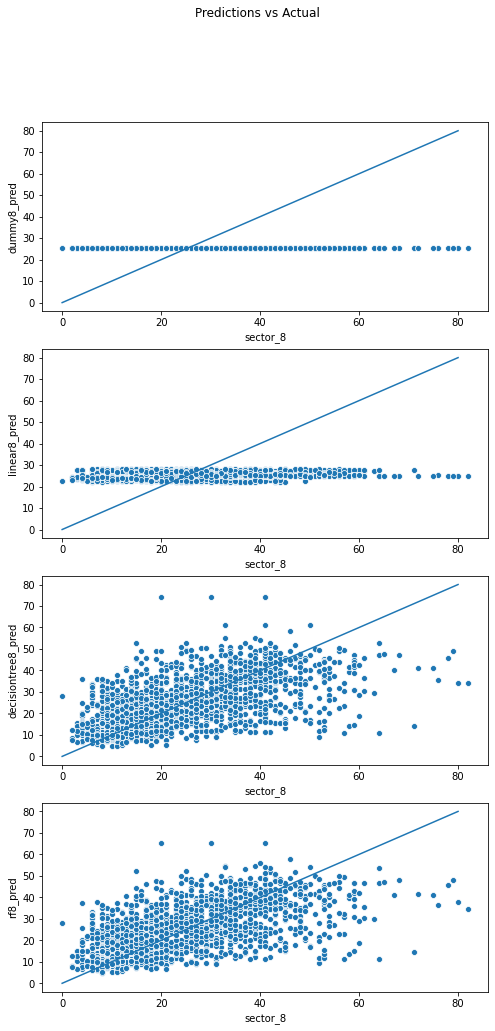

In [21]:
# Step 8a: Print the RMSE between the y test and the prediction

# Step 8b: Plot a scatter plot test dependent variables vs predictions
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharey=True)
fig.suptitle('Predictions vs Actual')
line_df = {'x':[0,80], 'y':[0,80]}

def subplot_model(i, model):
    rmse = mean_squared_error(y_test8['sector_8'], y_test8[model], squared=False)
    print(f"RMSE for {model} vs sector_8: {rmse}")
    normal_rmse = rmse/(y_test8['sector_8'].max() - y_test8['sector_8'].min())
    print(f"Normal RMSE for {model} : {normal_rmse}")
    sns.lineplot(ax=axes[i], data=line_df, x='x', y='y')
    sns.scatterplot(ax=axes[i], data=y_test8, x='sector_8', y=model)

models = y_test8.columns[-4:].tolist()
i = 0
for model in models:
    subplot_model(i, model)
    i += 1
plt.show()